# Faire son propre systeme de reconnaissance facial

## 1) Préparation de l'environnement

In [1]:
import face_recognition
import os
from PIL import Image, ImageDraw
import dlib
import numpy as np
import time
from elasticsearch import Elasticsearch
import ssl
from elasticsearch.connection import create_ssl_context

In [2]:
# check if dlib is installed with GPU/cuda support
print(dlib.DLIB_USE_CUDA)

True


## 2) Téléchargement d'une image de Donald Trump

In [3]:
!wget -O trump.jpg https://www.abc.net.au/cm/rimage/12681288-3x2-xlarge.jpg?v=2

--2021-04-16 16:19:07--  https://www.abc.net.au/cm/rimage/12681288-3x2-xlarge.jpg?v=2
Resolving www.abc.net.au (www.abc.net.au)... 2.21.16.101
Connecting to www.abc.net.au (www.abc.net.au)|2.21.16.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64478 (63K) [image/jpeg]
Saving to: ‘trump.jpg’

trump.jpg           100%[===================>]  62.97K  --.-KB/s    in 0.1s    

2021-04-16 16:19:10 (485 KB/s) - ‘trump.jpg’ saved [64478/64478]



## 3) Chargement de l'image sous forme de matrice

In [4]:
image = face_recognition.load_image_file("trump.jpg")
image

array([[[ 54, 109, 235],
        [ 54, 109, 235],
        [ 54, 109, 235],
        ...,
        [  5,  34, 104],
        [  4,  33, 103],
        [  4,  33, 103]],

       [[ 54, 109, 235],
        [ 54, 109, 235],
        [ 54, 109, 235],
        ...,
        [  5,  34, 102],
        [  4,  33, 103],
        [  4,  33, 103]],

       [[ 54, 109, 235],
        [ 54, 109, 235],
        [ 54, 109, 235],
        ...,
        [  6,  33, 102],
        [  5,  32, 101],
        [  5,  32, 101]],

       ...,

       [[  9,  13,  38],
        [ 10,  14,  41],
        [  9,  15,  41],
        ...,
        [ 99,   1,   0],
        [ 95,   1,   1],
        [ 92,   1,   0]],

       [[  9,  13,  38],
        [  9,  15,  41],
        [  9,  15,  41],
        ...,
        [106,   0,   0],
        [103,   1,   0],
        [ 99,   1,   0]],

       [[ 10,  14,  39],
        [  9,  15,  41],
        [  9,  15,  41],
        ...,
        [110,   1,   0],
        [106,   1,   0],
        [104,   0,   0]]

## 4) Detection des visages

In [5]:
face_locations = face_recognition.face_locations(image)
#(top, right, bottom, left)
face_locations

[(82, 440, 211, 311), (152, 784, 259, 677), (139, 540, 268, 411)]

## 5) Detection des points/repères sur les visages

In [6]:
face_landmarks_list = face_recognition.face_landmarks(image)
face_landmarks_list

[{'chin': [(309, 122),
   (310, 138),
   (312, 155),
   (316, 171),
   (323, 185),
   (334, 198),
   (349, 208),
   (365, 215),
   (383, 216),
   (399, 212),
   (413, 203),
   (424, 192),
   (432, 178),
   (436, 163),
   (439, 148),
   (439, 132),
   (439, 117)],
  'left_eyebrow': [(326, 113), (335, 108), (345, 107), (355, 109), (365, 111)],
  'right_eyebrow': [(382, 110),
   (391, 106),
   (402, 103),
   (412, 104),
   (421, 108)],
  'nose_bridge': [(375, 119), (376, 130), (377, 141), (377, 152)],
  'nose_tip': [(366, 160), (372, 161), (378, 162), (383, 161), (388, 159)],
  'left_eye': [(339, 123),
   (345, 121),
   (351, 120),
   (357, 122),
   (351, 124),
   (345, 125)],
  'right_eye': [(391, 121),
   (396, 117),
   (403, 116),
   (410, 118),
   (403, 120),
   (397, 121)],
  'top_lip': [(357, 185),
   (365, 181),
   (372, 177),
   (378, 178),
   (383, 176),
   (391, 178),
   (400, 181),
   (397, 181),
   (384, 180),
   (378, 182),
   (373, 182),
   (360, 184)],
  'bottom_lip': [(400

## 6) Example de Preview

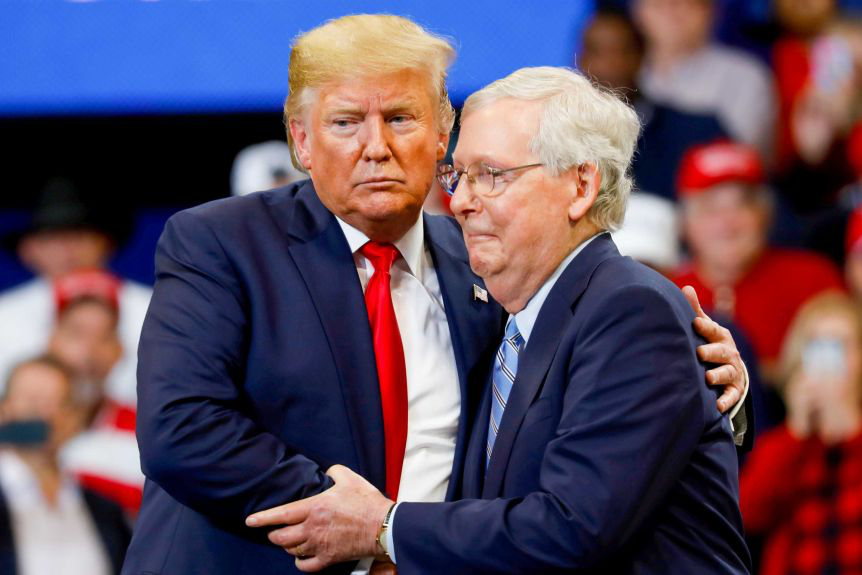

I found 3 face(s) in this photograph.
A face is located at pixel location Top: 82, Left: 311, Bottom: 211, Right: 440


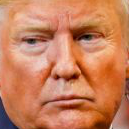

A face is located at pixel location Top: 152, Left: 677, Bottom: 259, Right: 784


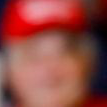

A face is located at pixel location Top: 139, Left: 411, Bottom: 268, Right: 540


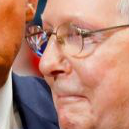

In [7]:
display(Image.fromarray(image))
print("I found {} face(s) in this photograph.".format(len(face_locations)))
print("=" * 100)

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)

    display(pil_image)
    print("=" * 100)

## 7) Dessiner une boite autour des visages

In [8]:
pil_image = Image.fromarray(image)

In [9]:
draw = ImageDraw.Draw(pil_image)

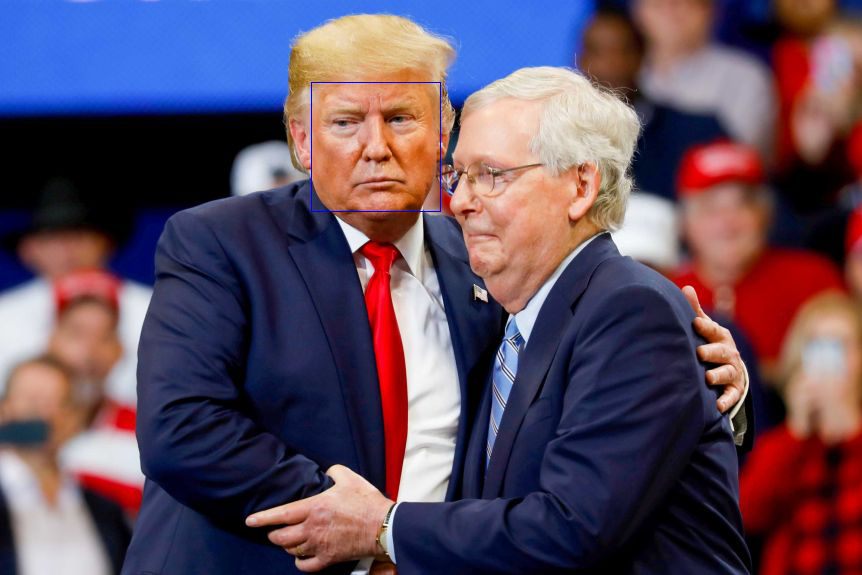

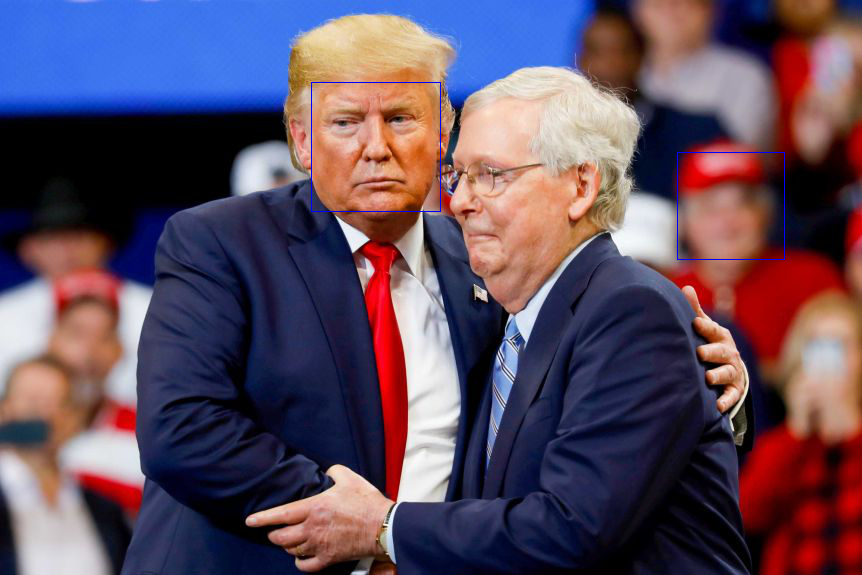

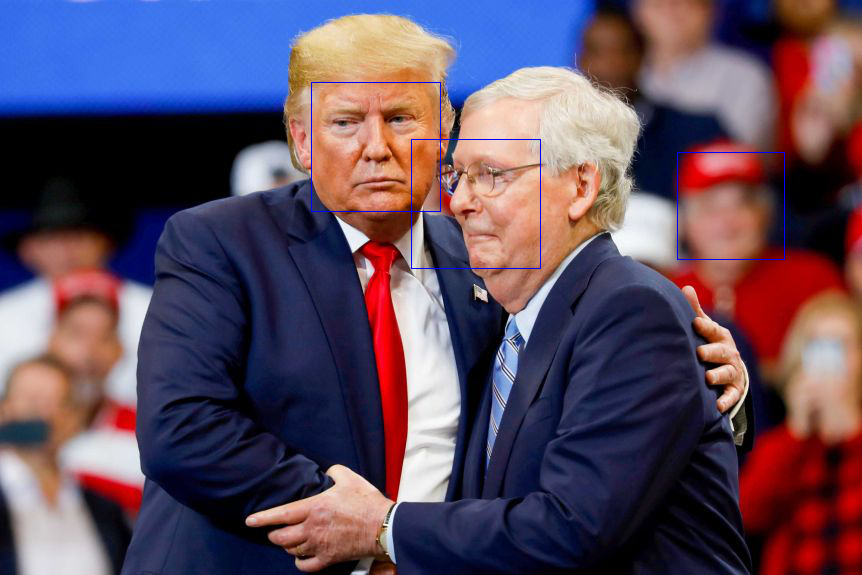

In [10]:

## format de dessin d'une boite
## (left, top), (right, bottom)
## pour rappel les face_locations sont au format
## top, right, bottom, left

for (top, right, bottom, left) in face_locations:
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))
    display(pil_image)

## 7) Encodage de la face de Trump

In [11]:
trump_encoding = face_recognition.face_encodings(image)[0]
trump_encoding

array([-0.15159972,  0.16988191,  0.06602512, -0.03344836, -0.07722421,
        0.0375332 ,  0.07398237, -0.16710085,  0.13391683, -0.08546437,
        0.17637944, -0.01254464, -0.3337189 , -0.09150028,  0.00424698,
        0.14459802, -0.10142203, -0.15072523, -0.18418592, -0.13374321,
        0.02337726,  0.03951183, -0.03783802, -0.03952872, -0.12163906,
       -0.22116672, -0.06843953, -0.07998858, -0.00798101, -0.06511829,
        0.0541769 ,  0.03021169, -0.21603711, -0.08453258, -0.03122734,
        0.07954131, -0.07972962, -0.07019237,  0.11865724,  0.01706134,
       -0.11400059, -0.00091474, -0.00937093,  0.23101377,  0.21046199,
       -0.03198095,  0.03428455, -0.14274485,  0.10884768, -0.24586374,
       -0.00194307,  0.12927544,  0.06167375,  0.12529698,  0.05345022,
       -0.10613785,  0.02821606,  0.10636677, -0.13296613,  0.05543222,
        0.07065652, -0.20939383, -0.08069059, -0.06298009,  0.06539072,
        0.07803072, -0.00537545, -0.1429999 ,  0.27005208, -0.14

In [12]:
len(trump_encoding)

128

## 9) On fait la meme avec Macron

In [13]:
!wget -O macron.jpg https://upload.wikimedia.org/wikipedia/commons/c/c3/Emmanuel_Macron_%28cropped%29.jpg

--2021-04-16 16:19:14--  https://upload.wikimedia.org/wikipedia/commons/c/c3/Emmanuel_Macron_%28cropped%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133503 (130K) [image/jpeg]
Saving to: ‘macron.jpg’

macron.jpg          100%[===================>] 130.37K  --.-KB/s    in 0.06s   

2021-04-16 16:19:15 (2.20 MB/s) - ‘macron.jpg’ saved [133503/133503]



In [14]:
image = face_recognition.load_image_file("macron.jpg")
image
macron_encoding = face_recognition.face_encodings(image)[0]
macron_encoding
len(macron_encoding)

128

## 8) Téléchargement d'une image pour tester

In [15]:
!wget -O G7.jpeg https://cdn-lejdd.lanmedia.fr/var/europe1/storage/images/lejdd/international/les-3-lecons-a-retenir-du-g7-a-biarritz-3916114/53419365-1-fre-FR/Les-3-lecons-a-retenir-du-G7-a-Biarritz.jpg

--2021-04-16 16:19:16--  https://cdn-lejdd.lanmedia.fr/var/europe1/storage/images/lejdd/international/les-3-lecons-a-retenir-du-g7-a-biarritz-3916114/53419365-1-fre-FR/Les-3-lecons-a-retenir-du-G7-a-Biarritz.jpg
Resolving cdn-lejdd.lanmedia.fr (cdn-lejdd.lanmedia.fr)... 99.86.116.56, 99.86.116.122, 99.86.116.79, ...
Connecting to cdn-lejdd.lanmedia.fr (cdn-lejdd.lanmedia.fr)|99.86.116.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 385740 (377K) [image/jpeg]
Saving to: ‘G7.jpeg’

G7.jpeg             100%[===================>] 376.70K  --.-KB/s    in 0.05s   

2021-04-16 16:19:16 (8.12 MB/s) - ‘G7.jpeg’ saved [385740/385740]



## 8) Nettoyage et organisation

In [16]:
def timing(f):
    def wrap(*args, **kwargs):
        time1 = time.time()
        ret = f(*args, **kwargs)
        time2 = time.time()
        print('{:s} function took {:.3f} ms'.format(f.__name__, (time2-time1)*1000.0))

        return ret
    return wrap

In [17]:
# 1 100 ms without cnn
# 2 2000 ms with cnn no cuda
# 200 ms with cnn and cuda
@timing
def get_faces_locations(image, cnn=None):
    if cnn:
        model = "cnn"
        
    face_locations = face_recognition.face_locations(image, model=model)
        
    return face_locations

In [18]:
def draw_box_faces(image, face_locations, display_image=True):
    pil_image = Image.fromarray(image)
    draw = ImageDraw.Draw(pil_image)
    
    ## format de dessin d'une boite
    ## (left, top), (right, bottom)
    ## pour rappel les face_locations sont au format
    ## top, right, bottom, left

    for (top, right, bottom, left) in face_locations:
        draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))
        if display_image:
            display(pil_image)
        
    return pil_image
    

get_faces_locations function took 765.715 ms


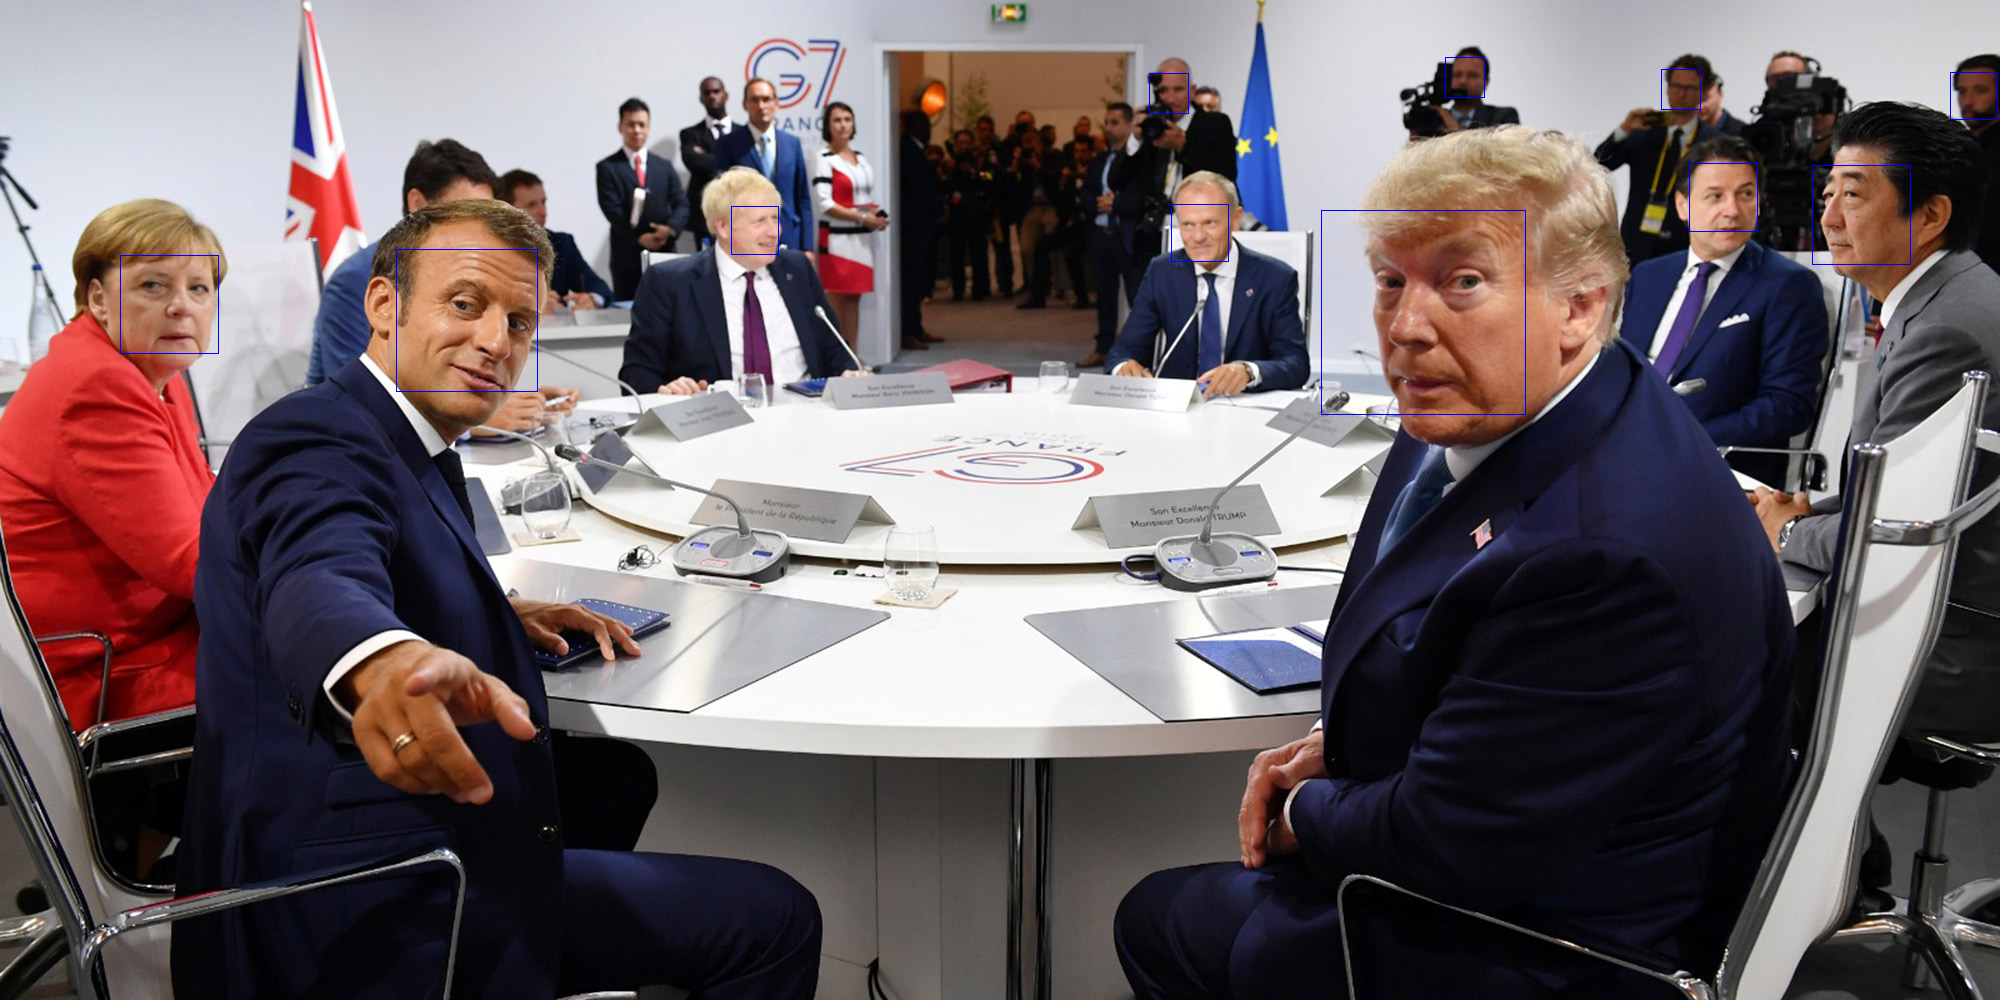

In [19]:
# Testing new functions
image_G7 = face_recognition.load_image_file("G7.jpeg")

face_locations = get_faces_locations(image_G7, True)
display(draw_box_faces(image_G7, face_locations, False))

## 9) Trouver une correspondance

In [20]:
## récuperer les encodings de toutes les personnes dans la photos
face_encodings = face_recognition.face_encodings(image_G7, face_locations)

In [21]:

known_face_names = ['Trump', 'Macron']
known_face_encodings = [trump_encoding, macron_encoding]

people_in_new_picture = []
for face_encoding in face_encodings:
    
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    name = "Unknown"

    # # If a match was found in known_face_encodings, just use the first one.
    # if True in matches:
    #     first_match_index = matches.index(True)
    #     name = known_face_names[first_match_index]

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)

    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    print(f"Found {name}")

Found Unknown
Found Macron
Found Unknown
Found Unknown
Found Unknown
Found Trump
Found Unknown
Found Unknown
Found Unknown
Found Unknown
Found Unknown


In [22]:
#1) Extraire les presidents / PM
#2) trouver un portrait pour chacun(e)
#3) encoder
#4) trouver un dataset de photos de politiques "G7 politique"
#5) comparer encoding avec les photos dans les images
#6) qui est copain.ine(s)



In [23]:
ssl_context = create_ssl_context()
ssl_context.check_hostname = False
ssl_context.verify_mode = ssl.CERT_NONE
    
es = Elasticsearch(hosts=[{'host': '127.0.0.1', 'port': 9200}],
                   scheme="https",
                   verify_certs=False,
                   ssl_context=ssl_context, 
                   http_auth=('admin', 'admin')
                  )

/opt/conda/lib/python3.7/site-packages/elasticsearch/connection/http_urllib3.py:159: UserWarning: When using `ssl_context`, all other SSL related kwargs are ignored
  "When using `ssl_context`, all other SSL related kwargs are ignored"


In [62]:
#Define KNN Elasticsearch index maping
knn_index = {
    "settings": {
        "index.knn": True
    },
    "mappings": {
        "properties": {
            "face_img_vector": {
                "type": "knn_vector",
                "dimension": 128
            }
        }
    }
}

#Creating the Elasticsearch index
es.indices.create(index="idx_faces",body=knn_index,ignore=400)
es.indices.get(index="idx_faces")

/opt/conda/lib/python3.7/site-packages/urllib3/connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/opt/conda/lib/python3.7/site-packages/elasticsearch/connection/base.py:200: ElasticsearchWarning: this request accesses system indices: [.opendistro_security], but in a future major version, direct access to system indices will be prevented by default
  warnings.warn(message, category=ElasticsearchWarning)
/opt/conda/lib/python3.7/site-packages/urllib3/connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


{'idx_faces': {'aliases': {},
  'mappings': {'properties': {'face_img_vector': {'type': 'knn_vector',
     'dimension': 128}}},
  'settings': {'index': {'number_of_shards': '1',
    'provided_name': 'idx_faces',
    'knn': 'true',
    'creation_date': '1618599190177',
    'number_of_replicas': '1',
    'uuid': 'FAajbmbwRKe-NvWaT6VjBw',
    'version': {'created': '7100299'}}}}}

In [51]:
known_face_names = ['Trump', 'Macron']
known_face_encodings = [trump_encoding, macron_encoding]

Trump
[-0.15159972  0.16988191  0.06602512 -0.03344836 -0.07722421  0.0375332
  0.07398237 -0.16710085  0.13391683 -0.08546437  0.17637944 -0.01254464
 -0.3337189  -0.09150028  0.00424698  0.14459802 -0.10142203 -0.15072523
 -0.18418592 -0.13374321  0.02337726  0.03951183 -0.03783802 -0.03952872
 -0.12163906 -0.22116672 -0.06843953 -0.07998858 -0.00798101 -0.06511829
  0.0541769   0.03021169 -0.21603711 -0.08453258 -0.03122734  0.07954131
 -0.07972962 -0.07019237  0.11865724  0.01706134 -0.11400059 -0.00091474
 -0.00937093  0.23101377  0.21046199 -0.03198095  0.03428455 -0.14274485
  0.10884768 -0.24586374 -0.00194307  0.12927544  0.06167375  0.12529698
  0.05345022 -0.10613785  0.02821606  0.10636677 -0.13296613  0.05543222
  0.07065652 -0.20939383 -0.08069059 -0.06298009  0.06539072  0.07803072
 -0.00537545 -0.1429999   0.27005208 -0.14040639 -0.15254223  0.01030029
 -0.06890794 -0.1104772  -0.31873095  0.03686214  0.37576881  0.15438381
 -0.20502515 -0.03481126 -0.09620494  0.009060

/opt/conda/lib/python3.7/site-packages/urllib3/connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/opt/conda/lib/python3.7/site-packages/elasticsearch/connection/base.py:200: ElasticsearchWarning: this request accesses system indices: [.opendistro_security], but in a future major version, direct access to system indices will be prevented by default
  warnings.warn(message, category=ElasticsearchWarning)
/opt/conda/lib/python3.7/site-packages/urllib3/connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


In [63]:
def es_import(i):
    es.index(index='idx_faces',
             body={"face_img_vector": i[0], 
                   "name": i[1],
                   "img_path": i[2]}
            )

In [ ]:
for idx, face_encoding in enumerate(known_face_encodings):
    print(known_face_names[idx])
    print(face_encoding)
    vector_values = list(face_encoding)
    print(vector_values)
    vector = {"person" : known_face_names[idx], "face_encoding" : vector_values}
    es.index(index='idx_faces', body=vector, doc_type='_doc')

In [60]:
k = 1
idx_name = 'face_recognition4'
res = es.search(request_timeout=30, index=idx_name,
                body={'size': k, 
                      'query': {'knn': {'face_encoding': {'vector': face_encoding.tolist(), 'k': k}}}})


{'took': 2, 'timed_out': False, '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0}, 'hits': {'total': {'value': 0, 'relation': 'eq'}, 'max_score': None, 'hits': []}}
Return top 1 with score: None


/opt/conda/lib/python3.7/site-packages/urllib3/connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


IndexError: list index out of range

In [ ]:
print(res)
print("Return top 1 with score: %s" % res['hits']['max_score'])

# print(res)
DISTANCE_THRESHHOLD = 0.8
if (res['hits']['hits'][0]['_score'] >= DISTANCE_THRESHHOLD):
    print("Found %s" % res['hits']['hits'][0]['_source']['name'])
    display_img(res['hits']['hits'][0]['_source']['img_path'])
else:
    print("No faces found.")